[18, 8, 11, 15]
(-90.13772583007812-125.41253662109375j)
13578.36556490354
[12, 20, 15, 9]
(-89.66046142578125-125.1395263671875j)
13228.940992450565
[9, 20, 6, 14]
(-89.15213012695312-125.18115234375j)
13681.551602942487
[19, 6, 14, 11]
(-89.72305297851562-125.52883911132812j)
13571.366133686834
[20, 6, 10, 16]
(-89.37460327148438-125.59283447265625j)
13505.517932254541
[5, 19, 13, 8]
(-90.22088623046875-125.41180419921875j)
13439.0565899545
[20, 9, 5, 14]
(-89.50588989257812-125.060546875j)
13253.879315066388
[16, 4, 11, 7]
(-91.175048828125-125.51776123046875j)
14190.354789719291
[20, 8, 14, 5]
(-89.72964477539062-125.42520141601562j)
13203.523690156542
[11, 19, 16, 4]
(-90.64620971679688-125.39920043945312j)
13860.917561402784
[14, 7, 18, 4]
(-90.4085693359375-124.9508056640625j)
14030.527857545892
[8, 15, 18, 4]
(-90.43917846679688-124.88876342773438j)
14035.66511064447
[20, 17, 13, 10]
(-89.09909057617188-125.6978759765625j)
12957.26923875167
[17, 20, 12, 5]
(-89.82025146484375-1

C:\Users\user\AppData\Local\Temp\ipykernel_6344\4293636503.py:176: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


[12, 4, 7, 19]
(-91.0537109375-125.26416015625j)
13725.916300669229
[20, 7, 17, 10]
(-89.50765991210938-125.73208618164062j)
13300.428675016849
[7, 19, 15, 12]
(-90.2325439453125-125.28631591796875j)
13553.92082661243
[16, 4, 20, 12]
(-90.395751953125-125.33609008789062j)
13771.747824395254
[20, 12, 15, 8]
(-89.88421630859375-125.50418090820312j)
13492.919526696935
[6, 15, 20, 11]
(-89.75128173828125-125.67263793945312j)
13911.970090874933
[14, 20, 5, 17]
(-89.17205810546875-125.31802368164062j)
13234.295986434285
[15, 5, 8, 19]
(-90.10858154296875-125.14529418945312j)
13477.46788572817
[5, 14, 8, 20]
(-89.72964477539062-125.42520141601562j)
13203.523690156542
[14, 8, 5, 17]
(-89.70327758789062-125.23074340820312j)
13316.273335525606
[8, 15, 4, 19]
(-90.43612670898438-125.04351806640625j)
14019.5108503102
[14, 17, 20, 6]
(-88.81829833984375-125.43862915039062j)
13530.788571702209
[10, 18, 6, 14]
(-89.3111572265625-125.13348388671875j)
13850.992422211442
[8, 20, 13, 17]
(-89.34222412109

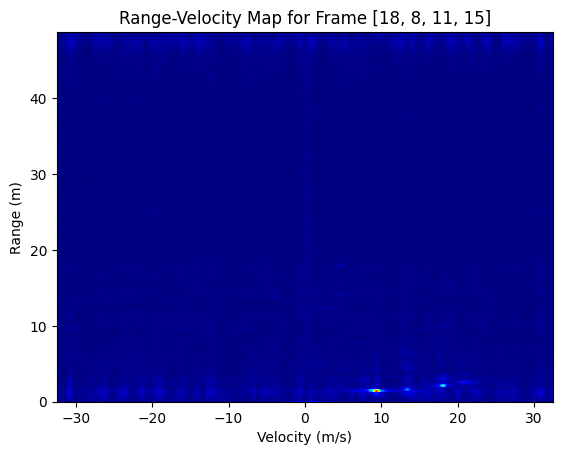

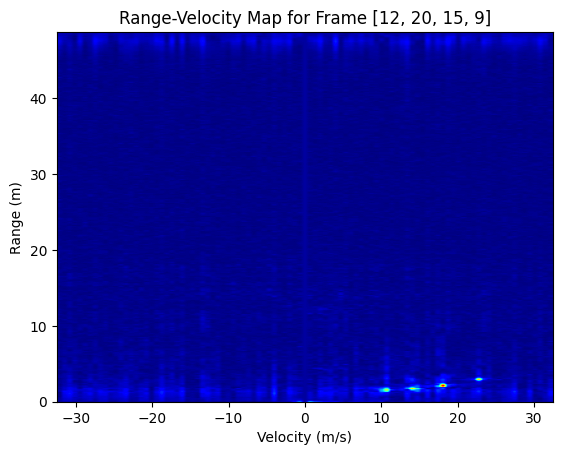

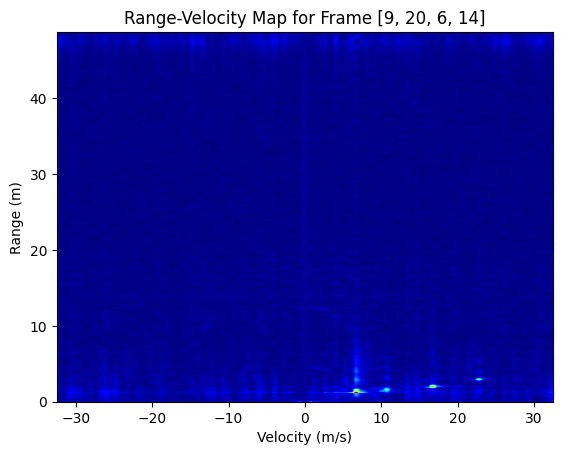

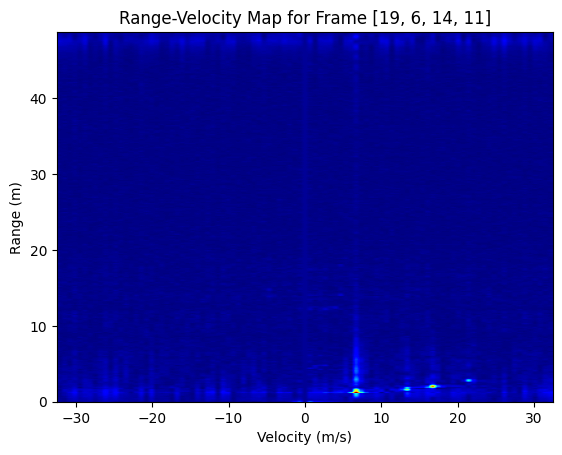

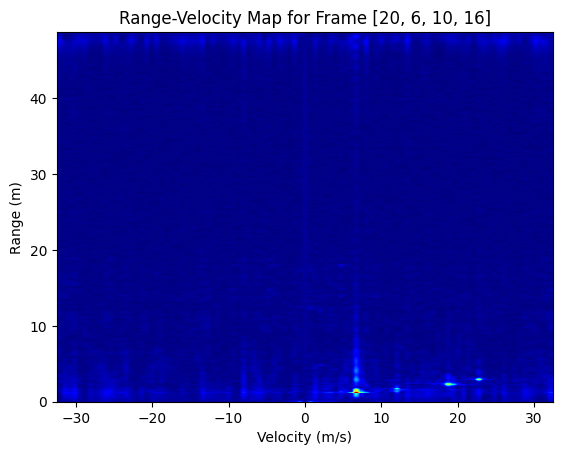

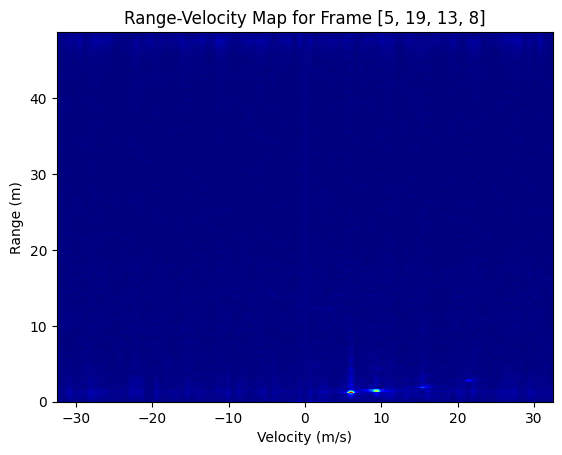

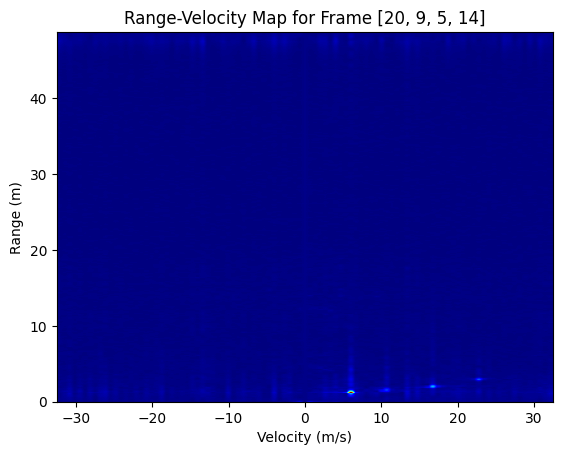

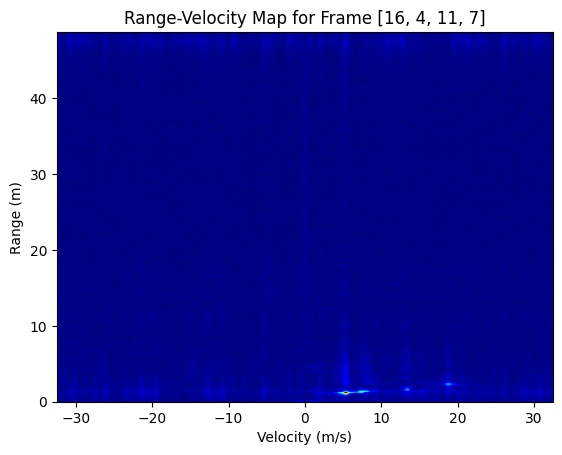

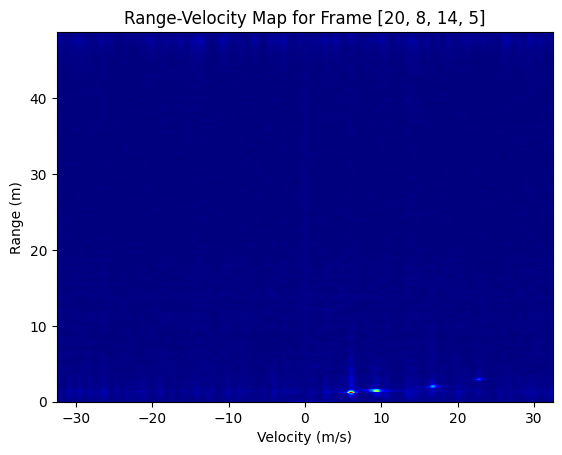

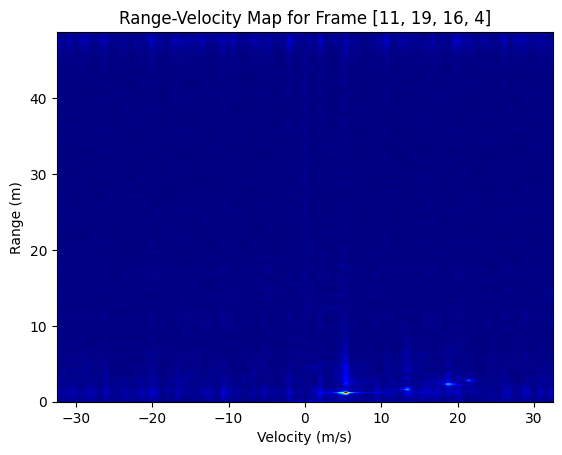

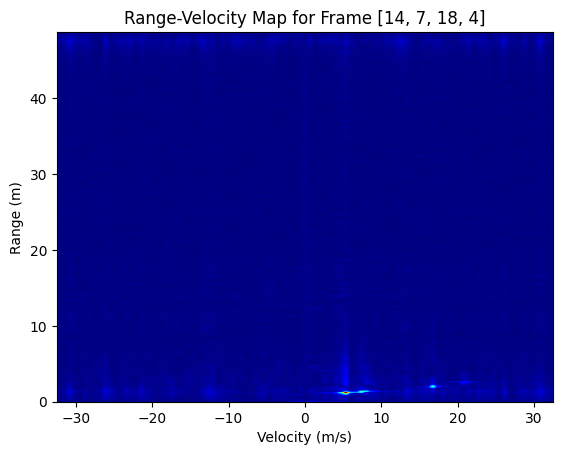

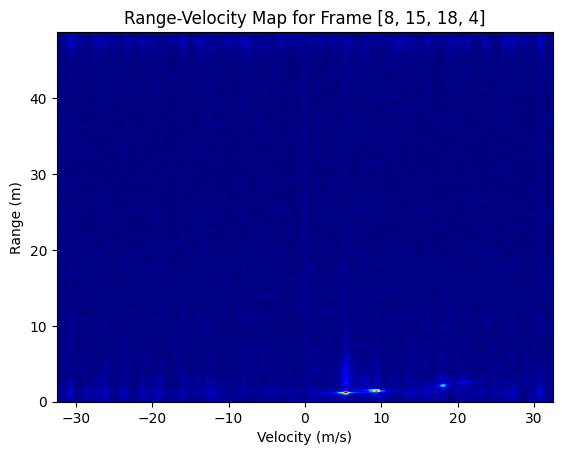

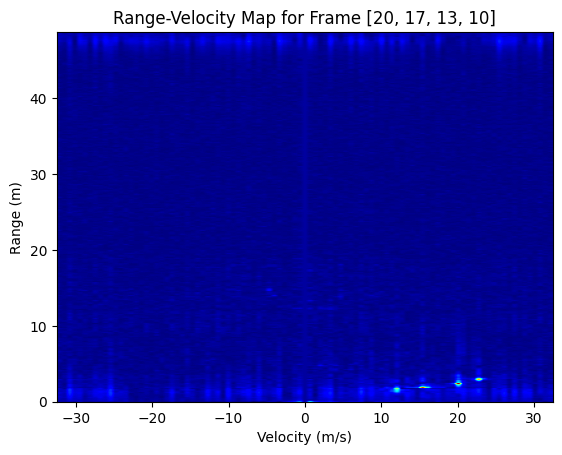

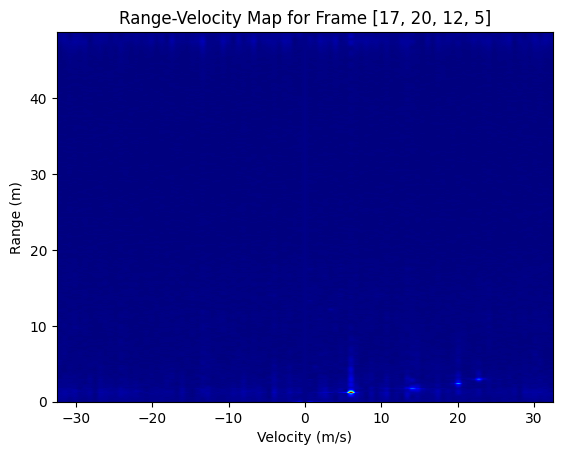

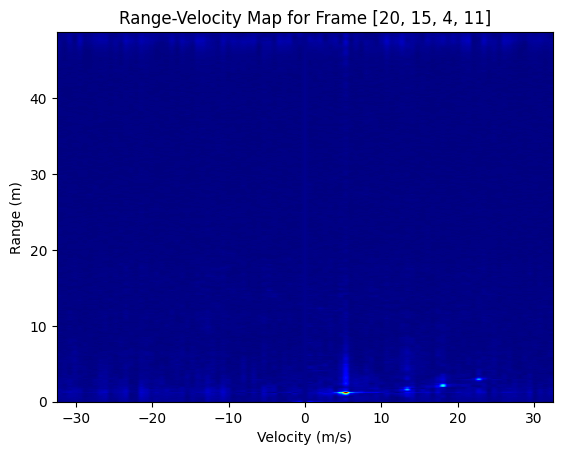

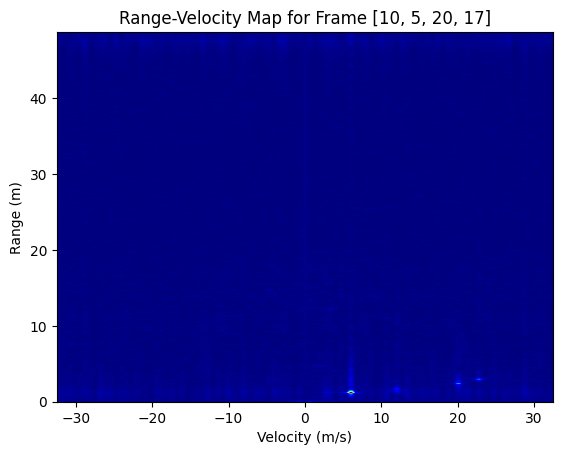

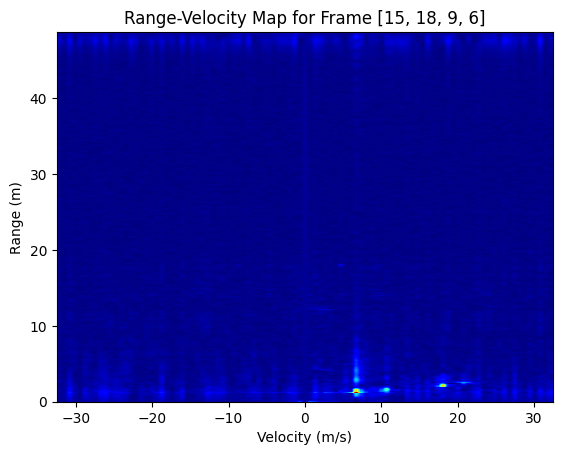

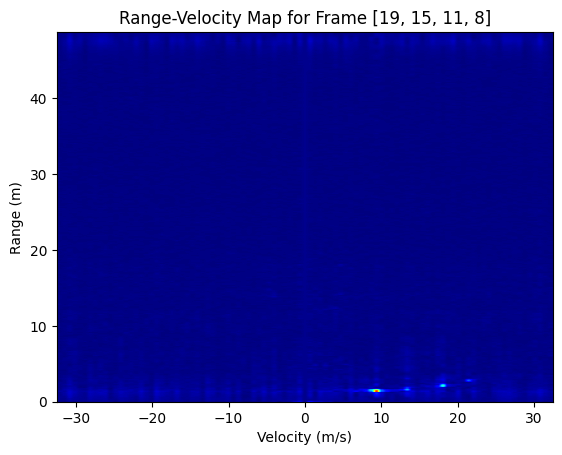

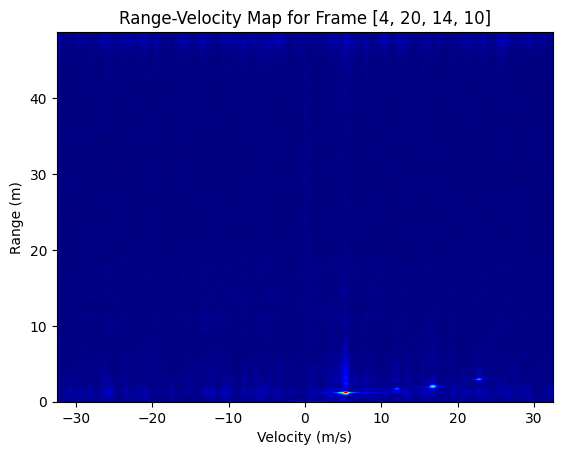

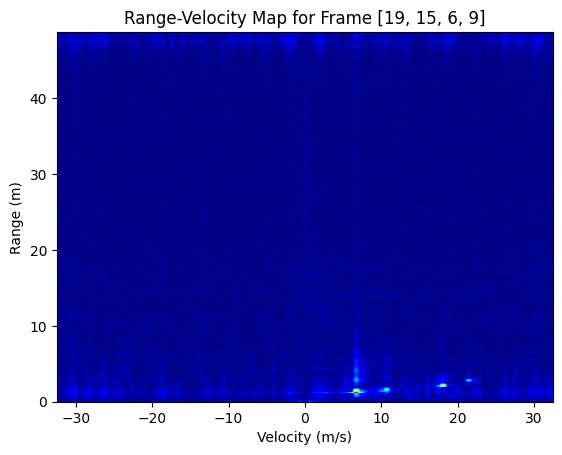

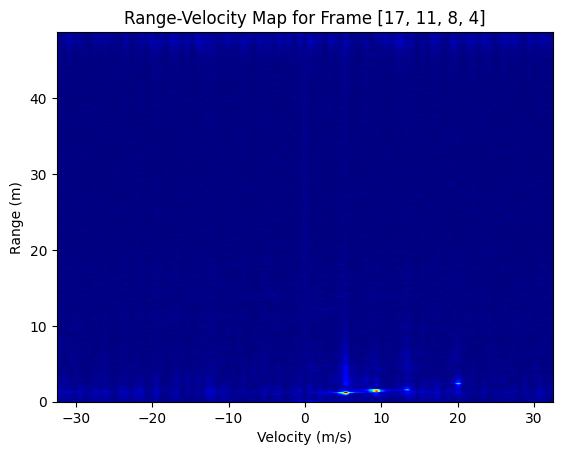

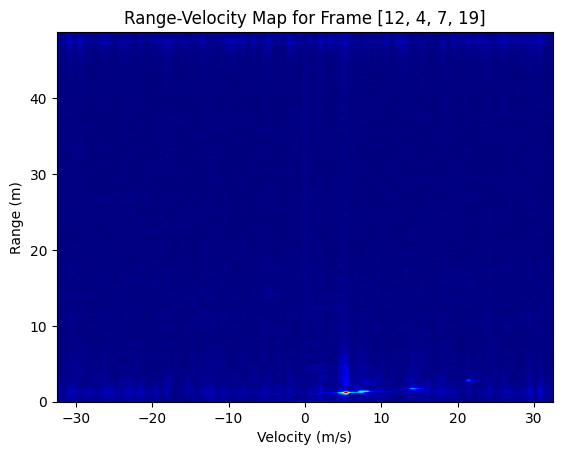

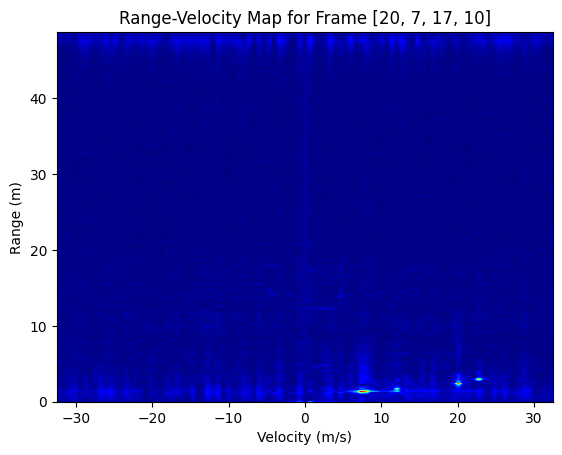

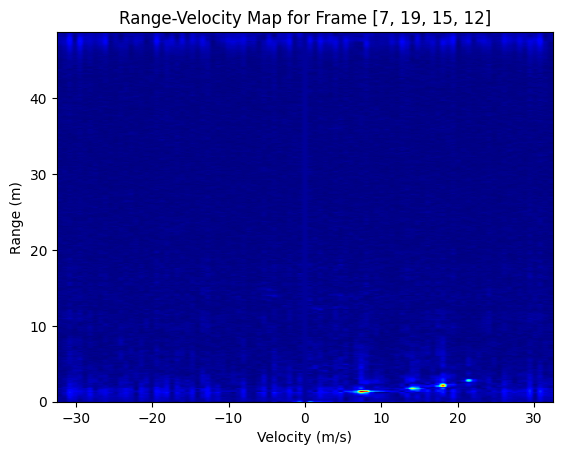

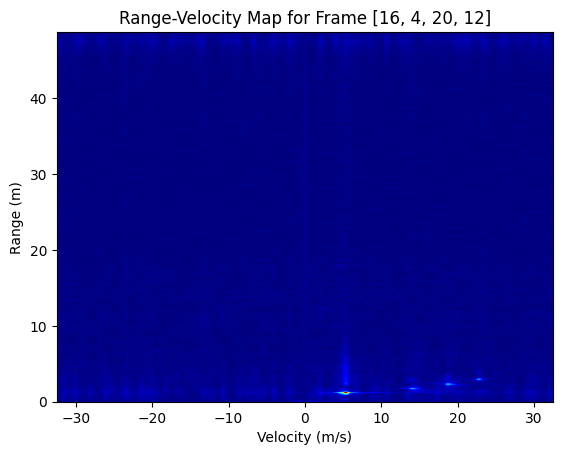

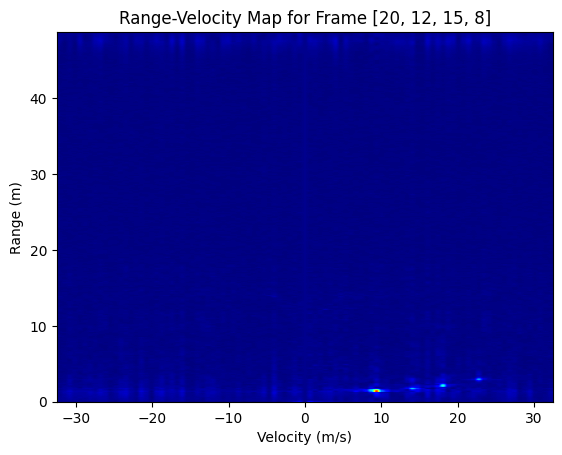

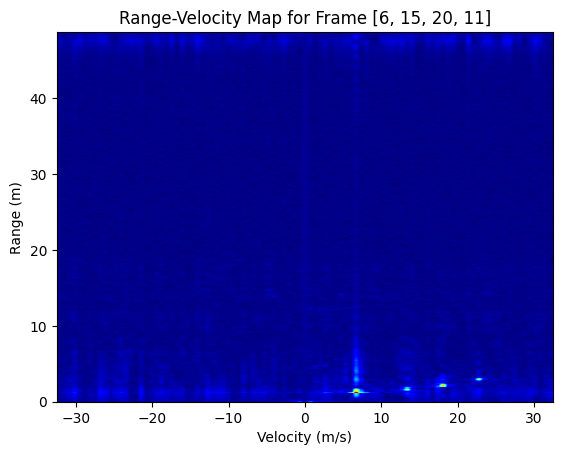

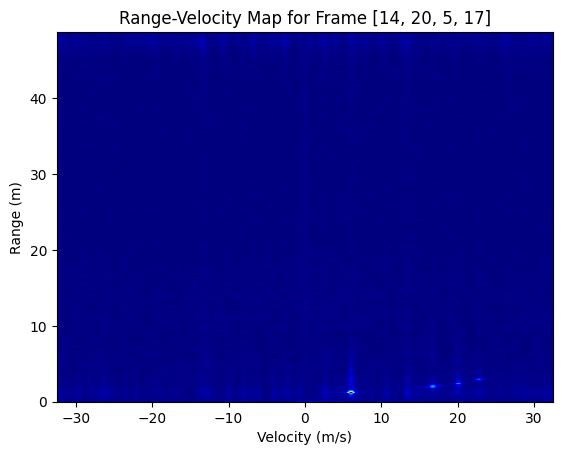

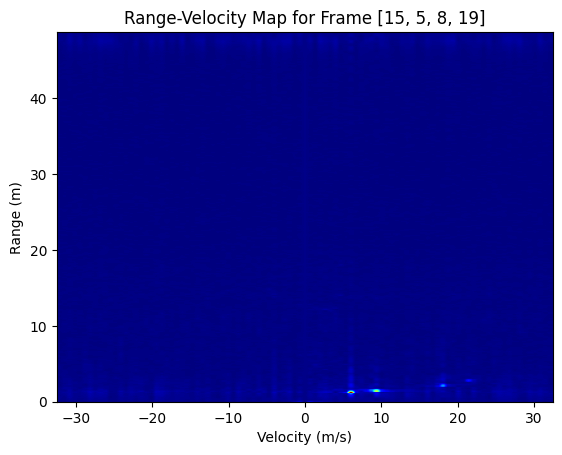

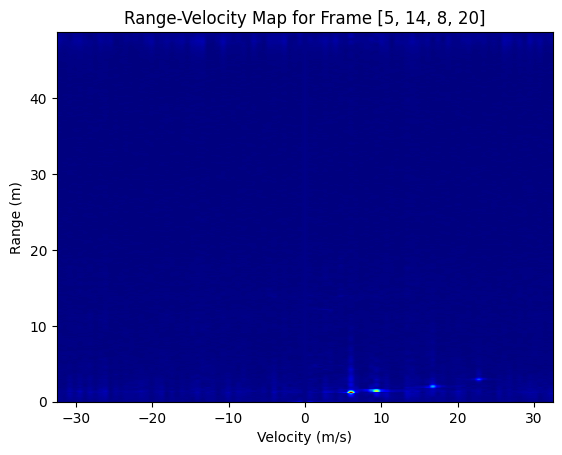

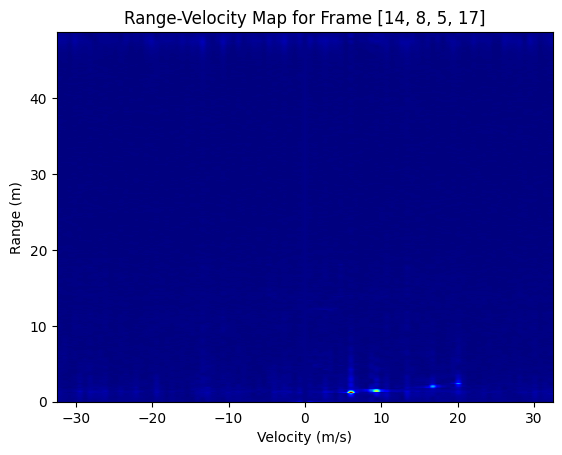

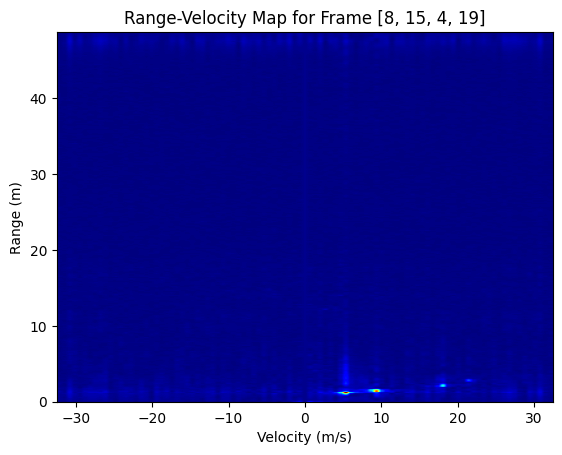

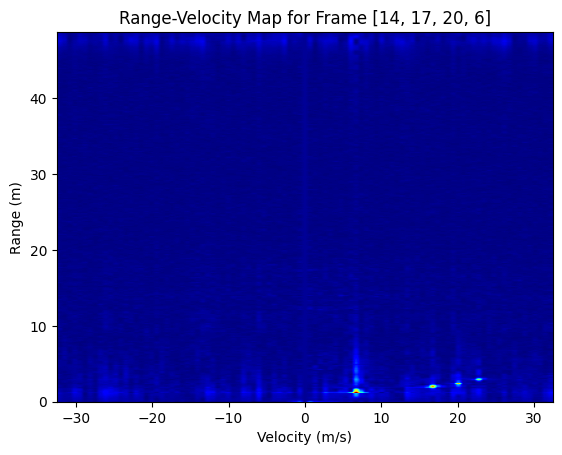

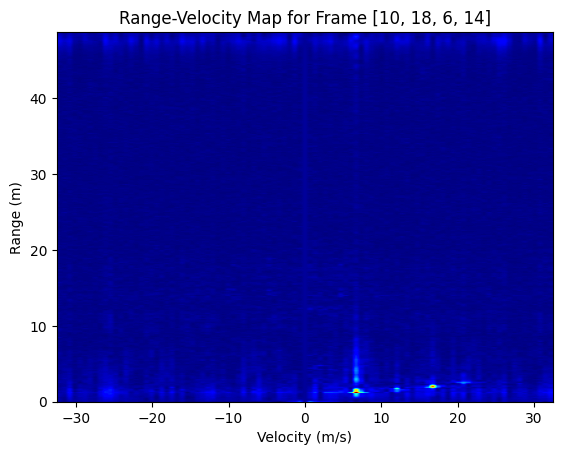

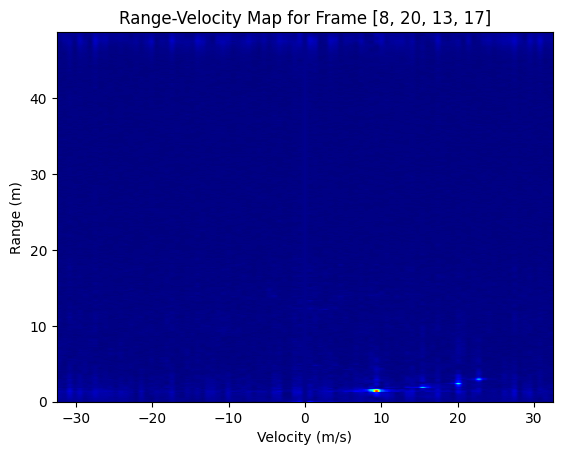

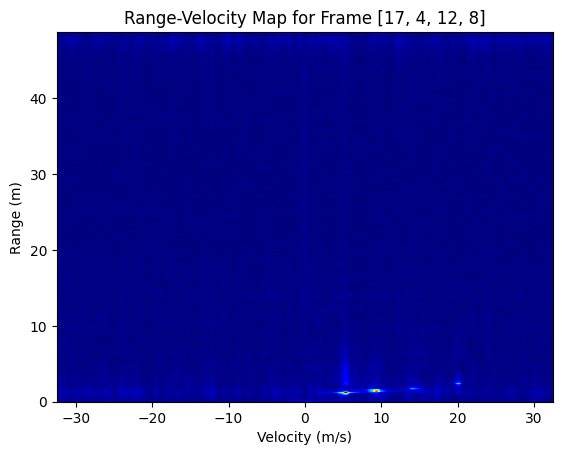

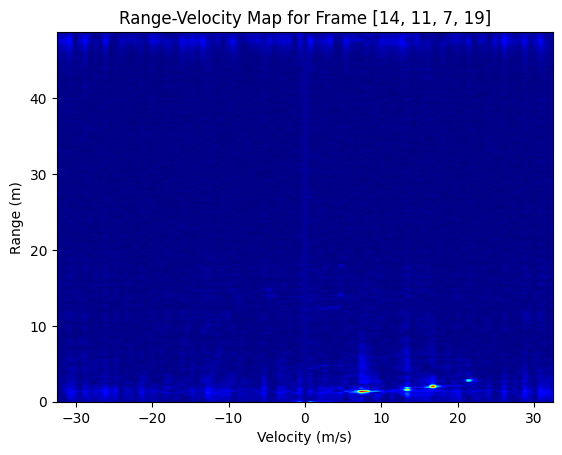

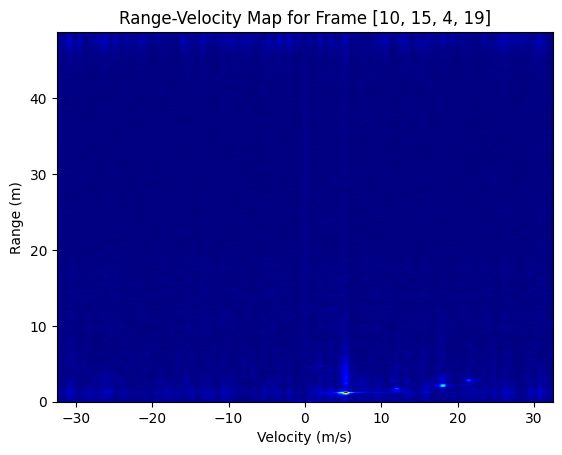

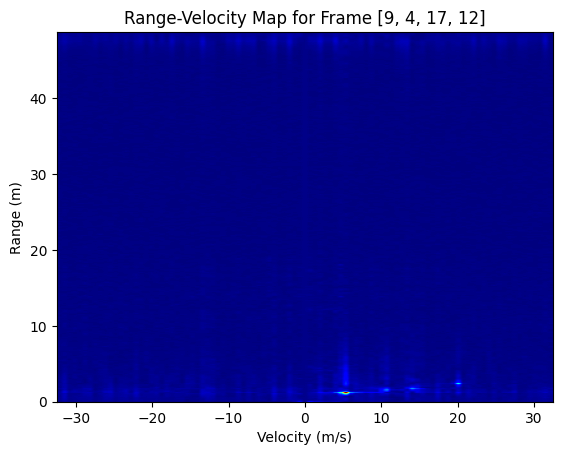

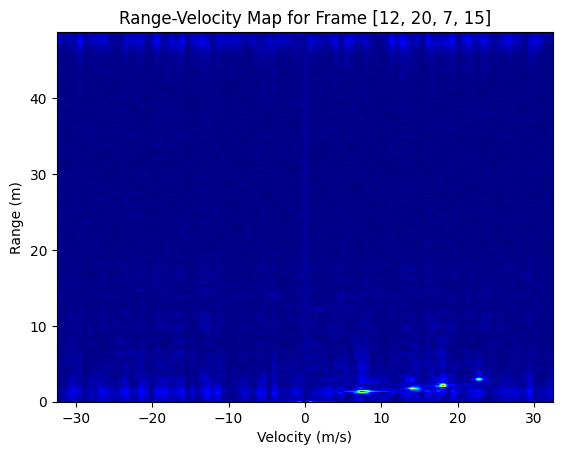

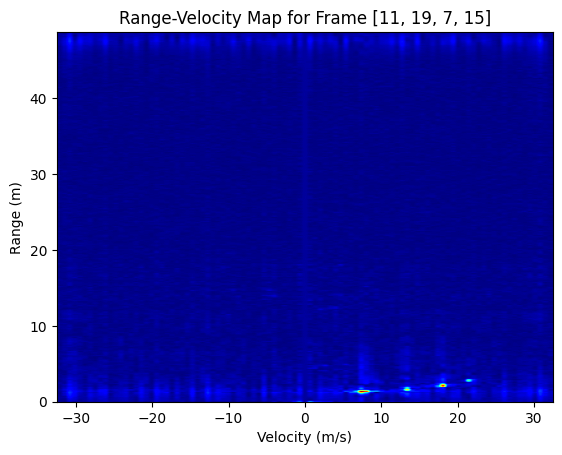

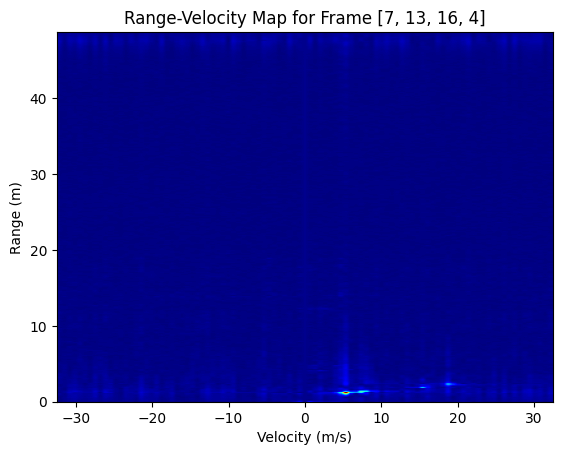

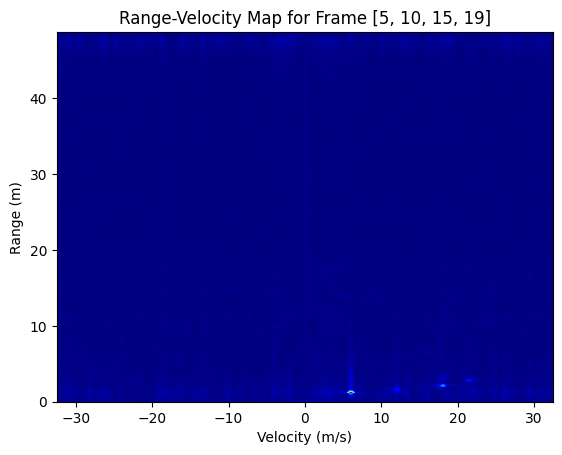

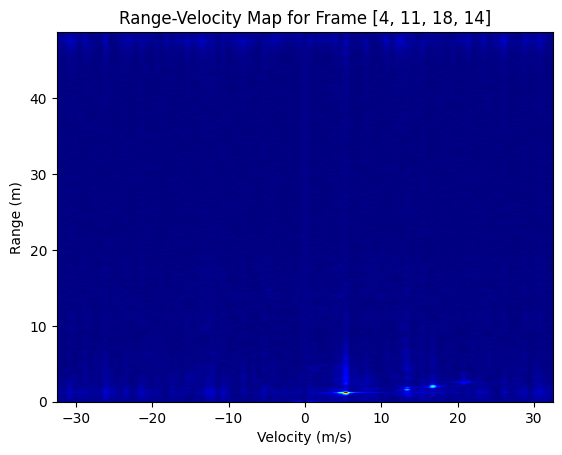

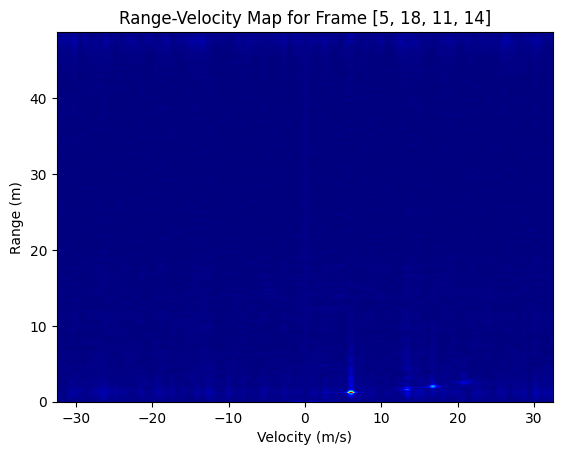

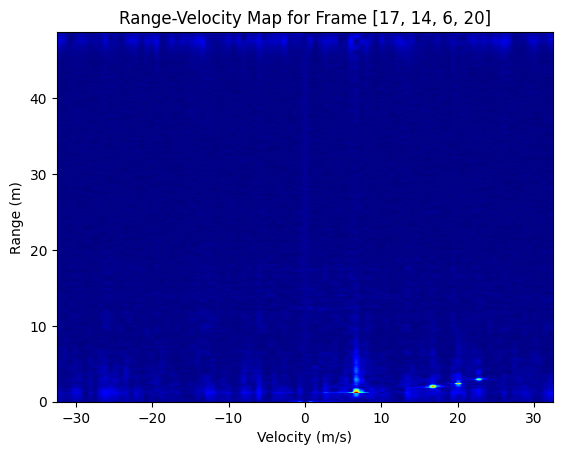

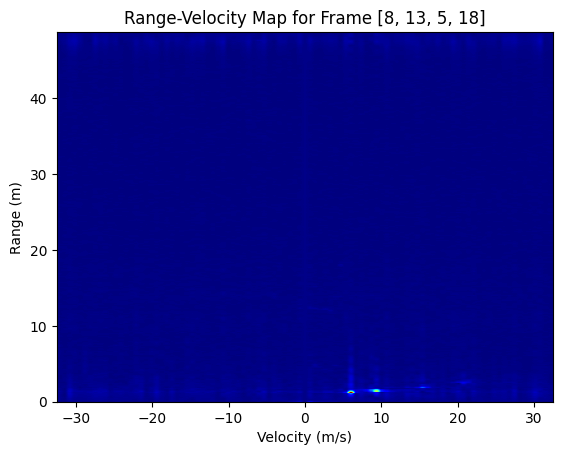

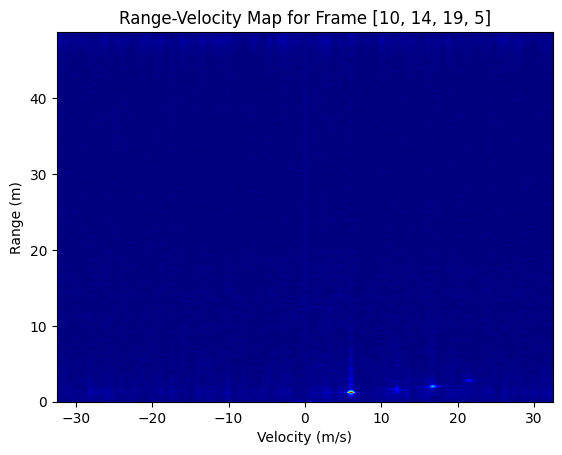

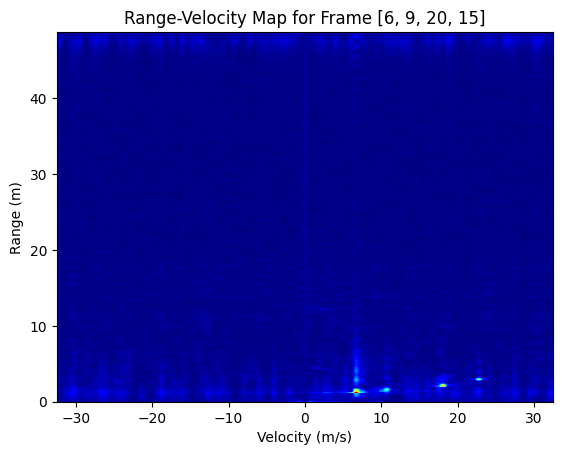

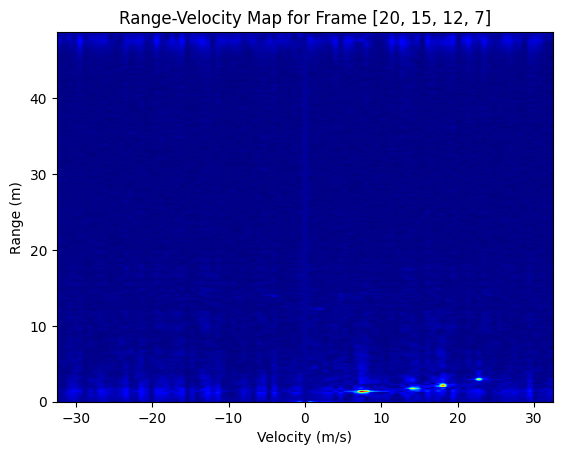

In [29]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
import random
import os

# Define file path and parameters
def shifted_data(input_array,range_shift,velocity_shift):
    radar_data=input_array
        # Define parameters
    slope = 29.9817e12
    chirp_duration = 30e-6
    c = 3e8  # Speed of light in m/s
    # Assuming radar_data is already defined as a numpy array
    n_samples = radar_data.shape[1]  # Get number of samples per chirp
    n_chirps = radar_data.shape[0]  # Get number of chirps

    # Calculate the sample rate
    sample_rate = n_samples / chirp_duration

    # Create the time vector for range shift
    time = np.arange(n_samples) / sample_rate
  

    # Calculate the frequency shift due to range shift
    frequency_shift_range = 2 * slope * velocity_shift / c

    # Calculate the phase shift for range shift
    phase_shift_velocity = 2 * np.pi * frequency_shift_range * time

    # Apply the range phase shift to radar data
    shifted_data_array = radar_data * np.exp(-1j * phase_shift_velocity)

    # Define velocity shift
  

    # Create the time vector for velocity shift (column vector)
    time_velocity = np.arange(n_chirps) * chirp_duration

    # Calculate the frequency shift due to velocity shift
    frequency_shift_velocity = 2 * slope * range_shift / c

    # Calculate the phase shift for velocity shift
    phase_shift_range = 2 * np.pi * frequency_shift_velocity * time_velocity

    # Apply the velocity phase shift to the radar data
    shifted_data_array = shifted_data_array * np.exp(-1j * phase_shift_range[:, np.newaxis])  # Broadcasting phase shift across samples
    return shifted_data_array

fileFullPath_1 = r'D:\Drone-Swarm-Detection-with-AWR2243\Our data\Radar_Data\phantom_forward_2\slave3_0000_data.bin';
fileFullPath_2 = r'D:\Drone-Swarm-Detection-with-AWR2243\Our data\Radar_Data\phantom_forward_2\slave3_0000_data.bin';
fileFullPath_3 = r'D:\Drone-Swarm-Detection-with-AWR2243\Our data\Radar_Data\phantom_forward_2\slave3_0000_data.bin';
fileFullPath_4 = r'D:\Drone-Swarm-Detection-with-AWR2243\Our data\Radar_Data\phantom_forward_2\slave3_0000_data.bin';
file_paths=[fileFullPath_1,fileFullPath_2,fileFullPath_3,fileFullPath_4 ]
frameIdx = 50# Index of the frame to read
numSamplePerChirp = 256  # Number of samples per chirp
numChirpPerLoop = 12  # Number of chirps per loop
numLoops = 128 # Number of loops per frame
numRXPerDevice = 4  # Number of receiving channels per device
numDevices = 4  # Number of devices in the cascade (if needed)
# Create the filter for zero Doppler clutter removal
cutoff_freq =10  # Set cutoff frequency for the high-pass filter (Hz)
sampling_freq = 1000  # Sampling frequency (example value, should match your data)
def butter_highpass(cutoff, fs, order=6):
    """Design a Butterworth high-pass filter."""
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a
b, a = butter_highpass(cutoff_freq, sampling_freq)
# Function to read binary radar data
def readBinFile(fileFullPath, frameIdx, numSamplePerChirp, numChirpPerLoop, numLoops, numRXPerDevice):
    Expected_Num_SamplesPerFrame = numSamplePerChirp * numChirpPerLoop * numLoops * numRXPerDevice * 2
    with open(fileFullPath, 'rb') as fp:
        # Move to the desired frame in the file
        fp.seek((frameIdx - 1) * Expected_Num_SamplesPerFrame * 2)
        adcData1 = np.fromfile(fp, dtype=np.uint16, count=Expected_Num_SamplesPerFrame)

    # Convert the 16-bit data to signed integers
    neg = (adcData1 >> 15) == 1  # Check the sign bit
    adcData1 = adcData1.astype(np.int32)
    adcData1[neg] -= 2**16

    # Combine the I and Q channels into complex values
    adcData1 = adcData1[0::2] + 1j * adcData1[1::2]

    # Reshape and permute the data
    adcData1Complex = np.reshape(adcData1, (numRXPerDevice, numSamplePerChirp, numChirpPerLoop, numLoops), order='F')
    adcData1Complex = np.transpose(adcData1Complex, (1, 3, 0, 2))  # Permute dimensions
    return adcData1Complex
# Define the range of possible values
min_value = 4
max_value = 20

# Number of values in the list
num_values = 4

# Function to check if all values in the list have a minimum distance of 3
def has_minimum_distance(values, min_distance=3):
    # Check the distance between each pair of values
    return all(abs(values[i] - values[j]) >= min_distance for i in range(len(values)) for j in range(i + 1, len(values)))

# Generate up to 30 unique valid combinations
valid_combinations = set()

while len(valid_combinations) < 50:
    # Randomly select 4 values within the range
    candidate = random.sample(range(min_value, max_value + 1), num_values)
    
    # Check if the candidate list meets the minimum distance requirement
    if has_minimum_distance(candidate):
        # Convert the list to a tuple to ensure uniqueness in the set
        valid_combinations.add(tuple(candidate))

# Convert each tuple back to a list and print the results
for comb in valid_combinations:
    print(list(comb))
    frame_num_list=list(comb)
    #frame_num_list=[4,8,14,17]
    add_both_chirps_matrix = np.zeros((256, 128))

    for i in range(len(frame_num_list)):

        adcDataComplex= readBinFile(file_paths[i], frame_num_list[i], numSamplePerChirp, numChirpPerLoop, numLoops, numRXPerDevice)

        # Select antenna index and extract chirp ADC matrix
        # chirp_ADC_matrix = adcDataComplex[:, :, 3, :]
        # specific_transmitter_data = chirp_ADC_matrix[:, :, 0].T
        # if filter and b is not None and a is not None:
        #     specific_transmitter_data = filtfilt(b,a,specific_transmitter_data , axis=0)
        # chirps_matrix = specific_transmitter_data.T
        # specific_transmitter_data=np.transpose(specific_transmitter_data)
        # add_both_chirps_matrix=add_both_chirps_matrix+specific_transmitter_data
        chirp_ADC_matrix = adcDataComplex[:, :, 3, :]
        specific_transmitter_data = chirp_ADC_matrix[:, :, 0]
      
       
        add_both_chirps_matrix=add_both_chirps_matrix+specific_transmitter_data
        
    fc = 77e9
    c = 3e8
    sweepBandwidth = 0.89e9
    chirpDuration = 30e-6
   
    #specific_transmitter_data = filtfilt(b,a,  specific_transmitter_data , axis=0)
    # if filter and b is not None and a is not None:
    #         add_both_chirps_matrix=np.transpose(add_both_chirps_matrix)
    #         add_both_chirps_matrix = filtfilt(b,a,add_both_chirps_matrix , axis=0)
    #         add_both_chirps_matrix=np.transpose(add_both_chirps_matrix)
    #         chirps_matrix = add_both_chirps_matrix
    chirps_matrix = add_both_chirps_matrix
    mean_value=np.mean(chirps_matrix)
    print( mean_value)
    shifted_data_array=shifted_data(chirps_matrix,0,0)
    
    Nfft_range = 290
    Nfft_doppler = 97

    range_fft = np.fft.fft(shifted_data_array, Nfft_range, axis=0)
    doppler_fft = np.fft.fftshift(np.fft.fft(range_fft, Nfft_doppler, axis=1), axes=1)
    


    range_res = c / (2 * sweepBandwidth)
    max_range = range_res * (Nfft_range - 1)
    range_axis = np.linspace(0, max_range, Nfft_range)

    velocity_res = (c / fc) / (2 * numLoops * chirpDuration * 12)
    max_velocity = (c / fc) / (chirpDuration * 4)
    velocity_axis = np.linspace(-max_velocity, max_velocity, Nfft_doppler)
    mean_value=np.mean(np.abs(doppler_fft))
    print( mean_value)
    final_matrix=np.abs(doppler_fft)
    final_matrix[:,48]=mean_value
    # # Plot the Range-Velocity map (absolute value of FFT)
    plt.figure()
    plt.imshow( final_matrix, aspect='auto', extent=[velocity_axis[0], velocity_axis[-1], range_axis[0], range_axis[-1]], origin='lower',cmap='jet')
    #plt.imshow(20 * np.log10(np.abs(doppler_fft)), aspect='auto', extent=[velocity_axis[0], velocity_axis[-1], range_axis[0], range_axis[-1]], origin='lower',cmap='jet')
    plt.xlabel('Velocity (m/s)')
    plt.ylabel('Range (m)')
    plt.title(f'Range-Velocity Map for Frame {frame_num_list}')
    save_path = r'D:\FYP-SignalProcessing\DroneSwarmsImages\DJImavic2_clusters'
        # Save the figure
    filename = f"Range_Velocity_Map_Frame_{'_'.join(map(str, frame_num_list))}.png"
    filepath = os.path.join( save_path, filename)
    plt.savefig(filepath)
    plt.close()  # Close the plot to free memory

    print(f"Saved Range-Velocity Map as {filepath}") 



In [30]:
import os
output_drone_swarms_photos=r'D:\FYP-SignalProcessing\DroneSwarmsImages'

for comb in valid_combinations:
    print(list(comb))
    frame_num_list=list(comb)
    #frame_num_list=[4,8,14,17]
    add_both_chirps_matrix = np.zeros((256, 128))

    for i in range(len(frame_num_list)):

        adcDataComplex= readBinFile(file_paths[i], frame_num_list[i], numSamplePerChirp, numChirpPerLoop, numLoops, numRXPerDevice)

        # Select antenna index and extract chirp ADC matrix
        # chirp_ADC_matrix = adcDataComplex[:, :, 3, :]
        # specific_transmitter_data = chirp_ADC_matrix[:, :, 0].T
        # if filter and b is not None and a is not None:
        #     specific_transmitter_data = filtfilt(b,a,specific_transmitter_data , axis=0)
        # chirps_matrix = specific_transmitter_data.T
        # specific_transmitter_data=np.transpose(specific_transmitter_data)
        # add_both_chirps_matrix=add_both_chirps_matrix+specific_transmitter_data
        chirp_ADC_matrix = adcDataComplex[:, :, 3, :]
        specific_transmitter_data = chirp_ADC_matrix[:, :, 0]
      
       
        add_both_chirps_matrix=add_both_chirps_matrix+specific_transmitter_data
        
    fc = 77e9
    c = 3e8
    sweepBandwidth = 0.89e9
    chirpDuration = 30e-6
   
    #specific_transmitter_data = filtfilt(b,a,  specific_transmitter_data , axis=0)
    # if filter and b is not None and a is not None:
    #         add_both_chirps_matrix=np.transpose(add_both_chirps_matrix)
    #         add_both_chirps_matrix = filtfilt(b,a,add_both_chirps_matrix , axis=0)
    #         add_both_chirps_matrix=np.transpose(add_both_chirps_matrix)
    #         chirps_matrix = add_both_chirps_matrix
    chirps_matrix = add_both_chirps_matrix
    mean_value=np.mean(chirps_matrix)
    print( mean_value)
    shifted_data_array=shifted_data(chirps_matrix,0,0)
    
    Nfft_range = 290
    Nfft_doppler = 97

    range_fft = np.fft.fft(shifted_data_array, Nfft_range, axis=0)
    doppler_fft = np.fft.fftshift(np.fft.fft(range_fft, Nfft_doppler, axis=1), axes=1)
    


    range_res = c / (2 * sweepBandwidth)
    max_range = range_res * (Nfft_range - 1)
    range_axis = np.linspace(0, max_range, Nfft_range)

    velocity_res = (c / fc) / (2 * numLoops * chirpDuration * 12)
    max_velocity = (c / fc) / (chirpDuration * 4)
    velocity_axis = np.linspace(-max_velocity, max_velocity, Nfft_doppler)
    mean_value=np.mean(np.abs(doppler_fft))
    print( mean_value)
    final_matrix=np.abs(doppler_fft)
    final_matrix[:,48]=mean_value
    # # Plot the Range-Velocity map (absolute value of FFT)
    plt.figure()
    plt.imshow( final_matrix, aspect='auto', extent=[velocity_axis[0], velocity_axis[-1], range_axis[0], range_axis[-1]], origin='lower',cmap='jet')
    #plt.imshow(20 * np.log10(np.abs(doppler_fft)), aspect='auto', extent=[velocity_axis[0], velocity_axis[-1], range_axis[0], range_axis[-1]], origin='lower',cmap='jet')
    plt.xlabel('Velocity (m/s)')
    plt.ylabel('Range (m)')
    plt.title(f'Range-Velocity Map for Frame {frame_num_list}')
    
    # Save the figure
    filename = f"Range_Velocity_Map_Frame_{'_'.join(map(str, frame_num_list))}.png"
    filepath = os.path.join(output_drone_swarms_photos, filename)
    plt.savefig(filepath)
    plt.close()  # Close the plot to free memory

    print(f"Saved Range-Velocity Map as {filepath}") 



[18, 8, 11, 15]
(-90.13772583007812-125.41253662109375j)
13578.36556490354
Saved Range-Velocity Map as D:\FYP-SignalProcessing\DroneSwarmsImages\Range_Velocity_Map_Frame_18_8_11_15.png
[12, 20, 15, 9]
(-89.66046142578125-125.1395263671875j)
13228.940992450565
Saved Range-Velocity Map as D:\FYP-SignalProcessing\DroneSwarmsImages\Range_Velocity_Map_Frame_12_20_15_9.png
[9, 20, 6, 14]
(-89.15213012695312-125.18115234375j)
13681.551602942487
Saved Range-Velocity Map as D:\FYP-SignalProcessing\DroneSwarmsImages\Range_Velocity_Map_Frame_9_20_6_14.png
[19, 6, 14, 11]
(-89.72305297851562-125.52883911132812j)
13571.366133686834
Saved Range-Velocity Map as D:\FYP-SignalProcessing\DroneSwarmsImages\Range_Velocity_Map_Frame_19_6_14_11.png
[20, 6, 10, 16]
(-89.37460327148438-125.59283447265625j)
13505.517932254541
Saved Range-Velocity Map as D:\FYP-SignalProcessing\DroneSwarmsImages\Range_Velocity_Map_Frame_20_6_10_16.png
[5, 19, 13, 8]
(-90.22088623046875-125.41180419921875j)
13439.0565899545
Save